In [1]:
pip install diffusers transformers accelerate torch xformers python-barcode qrcode segno treepoem aztec-code-generator augraphy gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.4/359.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/7

In [2]:
!git clone https://huggingface.co/spaces/kinsung/qraf

Cloning into 'qraf'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (14/14), 4.30 KiB | 880.00 KiB/s, done.


In [3]:
import os
import barcode
from barcode.writer import ImageWriter
import qrcode
import segno
import treepoem
from aztec_code_generator import AztecCode

def generate_code(code_type, data, directory='generated_codes'):

    if not os.path.exists(directory):
        os.makedirs(directory)

    try:
        if code_type in ['EAN13', 'UPCA', 'EAN8', 'CODE128', 'CODE39']:
            code = barcode.get(code_type, data, writer=ImageWriter())
            # filename = f"{code_type}_{data}"
            # if filename[-3:] not in ('jpg', 'png'):
            filename = os.path.join(directory, f"{code_type}_{data}")
            code.save(filename)
            return filename + '.png'

        elif code_type == 'CODE93':
            image = treepoem.generate_barcode(code_type.lower(), data=data)
            filename = f"CODE93_{data}"
            if filename[-3:] not in ('jpg', 'png'):
              filename = os.path.join(directory, f"CODE93_{data}.png")
            image.save(filename)
            return filename

        elif code_type == 'AZTECCODE':
            # raise NotImplementedError("Aztec Code generation requires a different library.")
            aztec_code = AztecCode(data)

            filename = f"AZTECODE_{data}"
            if filename[-3:] not in ('jpg', 'png'):
              filename = os.path.join(directory, f"AZTECODE_{data}.png")
            aztec_code.save(filename, module_size=4, border=1)

        elif code_type == 'PDF417':
            # Generate PDF417 using treepoem
            image = treepoem.generate_barcode(code_type.lower(), data=data)
            filename = f"PDF417_{data}"
            if filename[-3:] not in ('jpg', 'png'):
              filename = os.path.join(directory, f"PDF417_{data}.png")
            image.save(filename)
            return filename

        elif code_type == 'DATAMATRIX':
            # Generate DataMatrix using treepoem
            image = treepoem.generate_barcode(code_type.lower(), data=data)
            filename = f"DATAMATRIX_{data}"
            if filename[-3:] not in ('jpg', 'png'):
              filename = os.path.join(directory, f"DATAMATRIX_{data}.png")
            image.save(filename)
            return filename

        elif code_type == 'QRCODE':
            # Generate QR Code using qrcode library
            qr = qrcode.QRCode(
                version=1,
                error_correction=qrcode.constants.ERROR_CORRECT_L,
                box_size=10,
                border=4,
            )
            qr.add_data(data)
            qr.make(fit=True)

            img = qr.make_image(fill_color="black", back_color="white")
            filename = os.path.join(directory, f"QRCODE_{data}.png")
            img.save(filename)
            return filename

        elif code_type == 'AZTECRUNE':
            # Generate Aztec Rune using segno
            aztec = segno.make(data)
            filename = os.path.join(directory, f"AZTECRUNE_{data}.png")
            aztec.save(filename)
            return filename

    except Exception as e:
        return -1

# Example usage:
code_types = ['EAN13', 'UPCA', 'CODE93', 'EAN8', 'CODE128', 'CODE39', 'PDF417', 'DATAMATRIX', 'QRCODE', 'AZTECRUNE', 'AZTECCODE']
data_samples = ['123456789012', '012345678901', 'CODE93DATA', '1234567', 'CODE128DATA', 'CODE39DATA']

# Generate codes and save them in the specified directory
# for ctype in code_types:
#     for data in data_samples:
#         print(generate_code(ctype, data))

# Generate specific QR Code and Aztec Rune as examples
# print(generate_code("QRCODE", "Hello World"))
# print(generate_code("AZTECRUNE", "Hello Aztec Rune"))

In [4]:
from random import randint
import random


def calc_check_digit(upc):
    check_sum = sum(int(x) * (1 + (1 - i % 2) * 2) for i, x in enumerate(upc))
    check_digit = (10 - (check_sum % 10)) % 10
    return str(check_digit)


def generate_upca():
    upc_prefix = "0"
    upc_middle = str(randint(10000, 99999))
    upc_check_digit = calc_check_digit(upc_prefix + upc_middle)
    upc = upc_prefix + upc_middle + upc_check_digit
    return upc


def generate_code39():
    # Define the characters allowed in a Code 39 barcode
    code39_chars = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ-. $/+%'

    code39_data = ''.join(random.choices(code39_chars, k=10))
    # Generate random data of length 10

    # Calculate the checksum character for Code 39
    checksum = sum([code39_chars.index(char) for char in code39_data]) % 43
    code39_encoded = code39_data + code39_chars[checksum]

    return code39_encoded


def generate_code93(length=None):
    if length is None:
        length = randint(1, 50)
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ-. $/+%'
    input_data = [random.choice(characters) for _ in range(length)]
    return ''.join(input_data)


def random_ascii(sz=256):
    return ''.join([chr(randint(0, 127)) for i in range(randint(1, sz))])


gens = {
    'ean13': lambda: str(randint(10**11, 10**12-1)),
    'upca': generate_upca,
    'plessey': lambda: hex(randint(0, 16**20)).upper()[2:],
    'code39': generate_code39,
    'code93': generate_code93,
    'datamatrix': random_ascii,
    'qrcode': random_ascii,
    'azteccode': random_ascii,
    'aztecrune': lambda: str(randint(0, 255)),
    'microqrcode': lambda: random_ascii(35),
}


dims = {
    'ean8': '1d',
    'ean13': '1d',
    'upca': '1d',
    'plessey': '1d',
    'code39': '1d',
    'code93': '1d',
    'datamatrix': '2d',
    'qrcode': '2d',
    'azteccode': '2d',
    'aztecrune': '2d',
    'microqrcode': '2d',
}


In [5]:
import augraphy

augs = {
    "BadPhotoCopy": augraphy.augmentations.BadPhotoCopy(),
    "BrightnessTexturize": augraphy.augmentations.BrightnessTexturize(),
    "ColorPaper": augraphy.augmentations.ColorPaper(),
    "Folding": augraphy.augmentations.Folding(),
    "LightingGradient": augraphy.augmentations.LightingGradient(),
    "NoisyLines": augraphy.augmentations.NoisyLines(),
    "ShadowCast": augraphy.augmentations.ShadowCast(),
}


In [65]:
from PIL import Image
import cv2
import json
import argparse
import treepoem
import numpy as np
from matplotlib import pyplot as plt

# from data_generator import gens, dims
# from augmentations import augs


def load_json(fname, *args, **kwargs):
    with open(fname) as f:
        return json.load(f, *args, **kwargs)


def save_json(jd, fname, *args, indent=4, **kwargs):
    with open(fname, 'w') as f:
        json.dump(jd, f, *args, indent=indent, **kwargs)


def aligned_affine(bar, distortion_matrix, fix_position=True):
    xps = [0, 0, 1, 1]
    yps = [1, 0, 0, 1]

    height, width, _ = bar.shape
    corners = np.array([[x*width, y*height, 1] for x, y in zip(xps, yps)]).T

    if fix_position:
        distortion_matrix = distortion_matrix.copy()
        distortion_matrix[:, -1] *= 0
        distortion_matrix[:, -1] = -np.min(distortion_matrix@corners, axis=-1)

    new_sz = np.ceil(np.max(distortion_matrix@corners, axis=-1)).astype(np.int32)
    img = cv2.warpAffine(bar, distortion_matrix, new_sz)
    return img, distortion_matrix@corners


def generate_perspective_distort(img, alpha=0.1, beta=0.01):
    xps = [0, 0, 1, 1]
    yps = [1, 0, 0, 1]
    height, width, _ = img.shape
    corners = np.array([[x*width, y*height, 1] for x, y in zip(xps, yps)]).T

    distortion_matrix = np.zeros((3, 3))
    distortion_matrix[:-1, :-1] = np.random.randn(2, 2)*alpha / 2 + np.eye(2)*(1.-alpha) / 2
    distortion_matrix[-1, :-1] = beta*np.abs(np.random.randn(1, 2)) / 2
    distortion_matrix[:-1, -1] *= 0
    distortion_matrix[-1, -1] = 1
    coords = (distortion_matrix@corners)[:-1]
    distortion_matrix[:-1, -1] = -np.min(coords, axis=-1)
    return distortion_matrix


def generate_aligned_perspective_distort(img, scale=0.1):
    xps = [0, 0, 1, 1]
    yps = [1, 0, 0, 1]
    height, width, _ = img.shape
    corners = np.array([[x*width, y*height] for x, y in zip(xps, yps)])
    corners_old = corners.copy()

    dx, dy = np.random.exponential(scale=width*scale / 2, size=corners.shape).T

    corners[0, 0] -= dx[0]
    corners[0, 1] += dy[0]

    corners[1, 0] -= dx[1]
    corners[1, 1] -= dy[1]

    corners[2, 0] += dx[2]
    corners[2, 1] -= dy[2]

    corners[3, 0] += dx[3]
    corners[3, 1] += dy[3]

    theta = np.pi*np.random.random()*2 / 5
    c, s = np.cos(theta), np.sin(theta)
    rotation_matrix = np.array(((c, -s), (s, c)))

    corners = corners@rotation_matrix

    distortion_matrix = cv2.getPerspectiveTransform(corners_old.astype(np.float32), corners.astype(np.float32))

    corners = np.array([[x*width, y*height, 1] for x, y in zip(xps, yps)]).T
    distortion_matrix[:-1, -1] *= 0
    distortion_matrix[-1, -1] = 1
    coords = (distortion_matrix@corners)[:-1]
    distortion_matrix[:-1, -1] = -np.min(coords, axis=-1)
    coords = distortion_matrix@corners
    coords = coords[:-1]/coords[-1]

    return distortion_matrix


def aligned_perspective(img, distortion_matrix):
    xps = [0, 0, 1, 1]
    yps = [1, 0, 0, 1]
    height, width, _ = img.shape
    corners = np.array([[x*width, y*height, 1] for x, y in zip(xps, yps)]).T
    coords = distortion_matrix@corners
    coords = coords[:-1]/coords[-1]

    new_sz = np.ceil(np.max(coords, axis=-1)).astype(np.int32)

    img = cv2.warpPerspective(img, distortion_matrix, new_sz)
    return img, coords


def coords_to_regions(coords, dimensions):
    res = []
    for i in range(len(coords)):
        ptsx, ptsy = coords[i]

        res.append({\
            'shape_attributes': {
                'name': 'polygon',
                'all_points_x': list(ptsx),
                'all_points_y': list(ptsy)
            },
            'region_attributes': {'barcode': dimensions[i]}
        })
    return res


def export(img, name, coords, dimensions):
    # np.clip(img, 0, 1)
    plt.imsave(f'{name}.jpg', img)
    res = {
        f'{name}.jpg813086': {
            'filename': f'../code/{name}.jpg',
            'size': 813086,
            'regions': coords_to_regions(coords, dimensions),
            'file_attributes': {}
        }
    }
    save_json(res, f'{name}.json')


def generate_distorted(barcode_types, content_barcodes, source_img=None,
                       augms=[], distortions=None, codes_to_augm=None):
    '''
    Generates image with barcodes and returns list of coords of barcodes on img
    Parameters:

    barcode_types: Iterable[str] -- list of barcode types to generate
                   see treepoem docs for available options

    content_barcodes: Iterable -- list of content to encode in barcodes

    source_img: np.array -- np.array of an image

    augms: Iterable[str] -- list of augmentation names,
                            see `augmentations.py` for options

    distortions: Iterable[np.array] -- list of parameters for spatial distort
    '''

    filenames = []
    if codes_to_augm is None:
        for code_type in barcode_types:
            for content in content_barcodes:
                result = generate_code(code_type, content)
                if isinstance(result, str):
                    filenames.append(result)

    # print(filenames)
        barimgs = [cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB) for fname in filenames]
    else:
        barimgs = codes_to_augm

    # barimgs = [np.array(treepoem.generate_barcode(typ, content)) for typ, content in zip(barcode_types, content_barcodes)]

    for aug_name in augms:
        barimgs = [augs[aug_name](img) for img in barimgs]
    if distortions is None:
        distortions = [generate_aligned_perspective_distort(np.array(img)) for img in barimgs]
    # imgs, coords = zip(*[aligned_affine(np.array(img), dis) for img, dis in zip(barimgs, distortions)])
    imgs, coords = zip(*[aligned_perspective(np.array(img), dis) for img, dis in zip(barimgs, distortions)])
    # masks, _ = zip(*[aligned_affine(np.ones_like(img), dis) for img, dis in zip(barimgs, distortions)])
    masks, _ = zip(*[aligned_perspective(np.ones_like(img), dis) for img, dis in zip(barimgs, distortions)])

    if source_img is None:
        width, height, _ = np.max([img.shape for img in imgs], axis=0)*len(imgs)//3
        combined = np.zeros((width, height, 3), dtype=imgs[0].dtype)
    else:
        combined = plt.imread(source_img)[:, :, :3]
        width, height, _ = combined.shape

    for i in range(len(imgs)):
        w, h, _ = imgs[i].shape
        # if width - w < 0 or height - h < 0:
        #     continue
        dw = np.random.randint(0, max(width - w, 10))
        dh = np.random.randint(0, max(height - h, 10))
        coords[i][0] += dh
        coords[i][1] += dw
        expanded_img = np.zeros_like(combined)
        expanded_img[dw:w+dw, dh:h+dh] = imgs[i][:width-dw, :height-dh]
        expanded_mask = np.zeros_like(combined)
        expanded_mask[dw:w+dw, dh:h+dh] = masks[i][:width-dw, :height-dh]
        combined = combined*(1-expanded_mask) + expanded_img
    return combined, coords, imgs


# if __name__ == '__main__':
if False:
    parser = argparse.ArgumentParser(prog='Distorted barcode generator', description='''TODO''')
    parser.add_argument('-c', '--config', help='json config to generate image with barcodes', type=str)
    parser.print_help()
    args = parser.parse_args()

    conf = load_json(args.config)
    print(conf)
    contents = conf.get('barcode_contents', None)
    if contents is None:
        contents = [gens[bar_type]() for bar_type in conf['barcode_types']]
    img, coords = generate_distorted(conf['barcode_types'], contents,
                                     source_img=conf.get('source_img', None),
                                     augms=conf.get('augmentations', []))
    dimensions = [dims[bar_type] for bar_type in conf['barcode_types']]
    export(img, conf['name'], coords, dimensions)


In [7]:
barcode_types = ['EAN13', 'UPCA', 'CODE93', 'EAN8', 'CODE128', 'CODE39', 'PDF417', 'DATAMATRIX', 'QRCODE', 'AZTECRUNE', 'AZTECCODE']
content_barcodes = ['123456789012', '012345678901', 'CODE93DATA', '1234567', 'CODE128DATA', 'CODE39DATA']

filenames = []
for code_type in barcode_types:
    for content in content_barcodes:
        result = generate_code(code_type, content)
        if isinstance(result, str):
            filenames.append(result)

In [8]:
source_img = '/content/example.jpg'
augms =  ["Folding", "LightingGradient"]

codes_to_augm = [cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB) for fname in filenames]



In [10]:
from qraf import app

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/955 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
from tqdm.notebook import tqdm

In [48]:
results = []
for img in tqdm(codes_to_augm):
    padding = (np.abs(np.array(img.shape[:-1]) - max(img.shape[:-1])) / 2).astype(int)
    img = np.pad(img, [(padding[0], padding[0]), (padding[1], padding[1]), (0, 0)], mode='constant', constant_values=np.max(img))
    control_image = Image.fromarray(img)
    prompt = 'On a mobile phone'
    negative_prompt = 'Nosiy, wavy'
    guidance_scale = 6
    sampler = 'Euler'
    control_start = 0
    control_end = 1
    strength = 1
    controlnet_conditioning_scale = 1
    seed = 0xCAFE
    results.append(app.inference(control_image, prompt, negative_prompt, guidance_scale, controlnet_conditioning_scale, control_start, control_end, strength, seed, sampler))

  0%|          | 0/31 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

  0%|          | 0/30 [00:00<?, ?steps/s]

In [58]:
print(filenames[-1])

generated_codes/AZTECRUNE_CODE39DATA.png


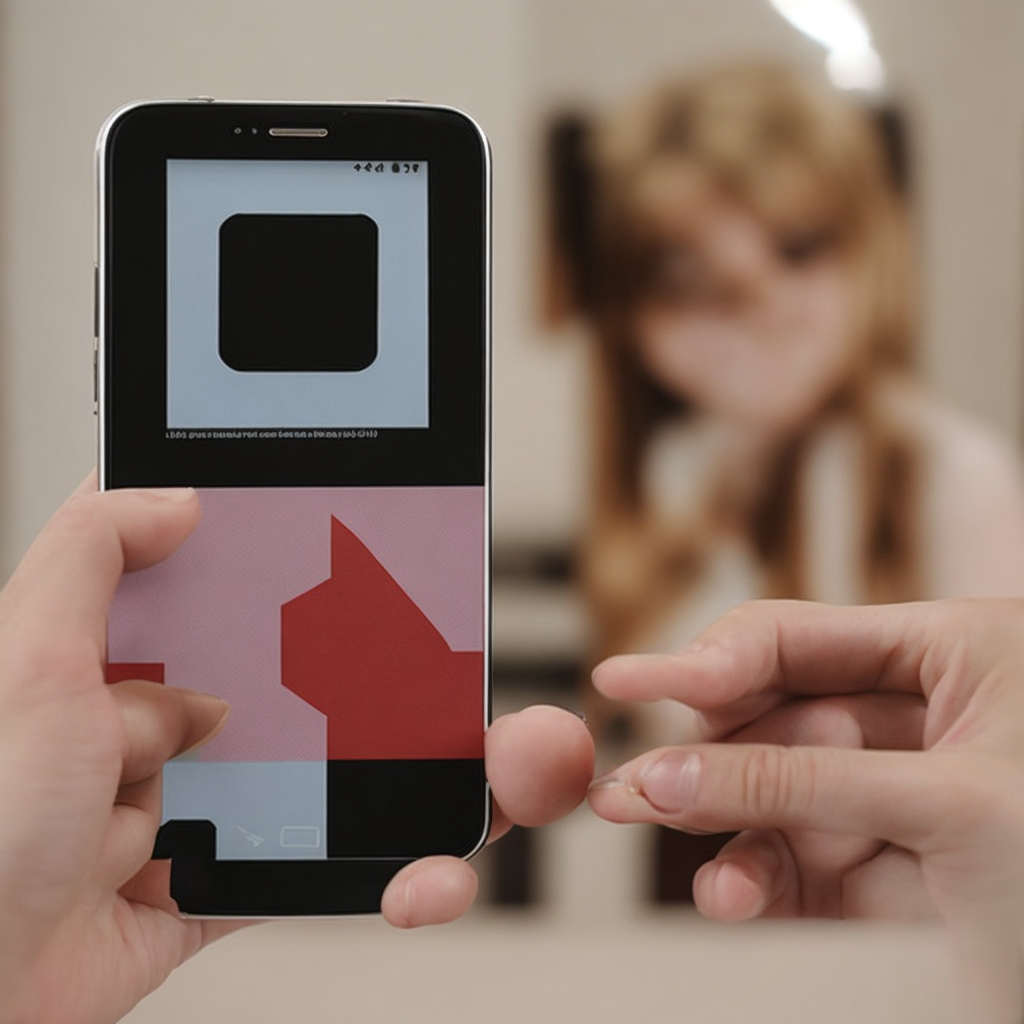

In [59]:
results[-1][0]

In [62]:
root, _, filenames = list(os.walk('/content/images'))[0]
codes_to_augm = [cv2.cvtColor(cv2.imread(f'{root}/{fname}'), cv2.COLOR_BGR2RGB) for fname in filenames]

In [66]:
img, coords, imgs = generate_distorted(code_types, data_samples,
                                       source_img=source_img,
                                       augms=augms, codes_to_augm=codes_to_augm)

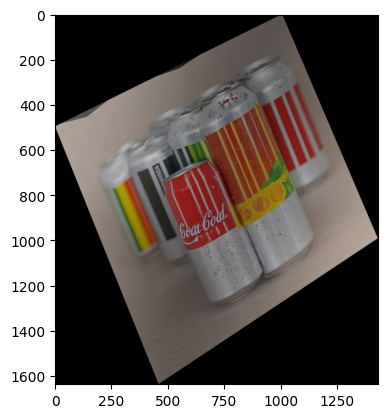

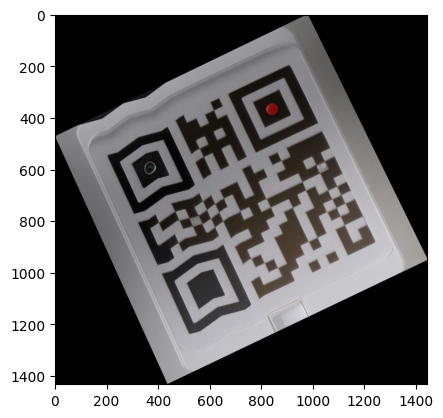

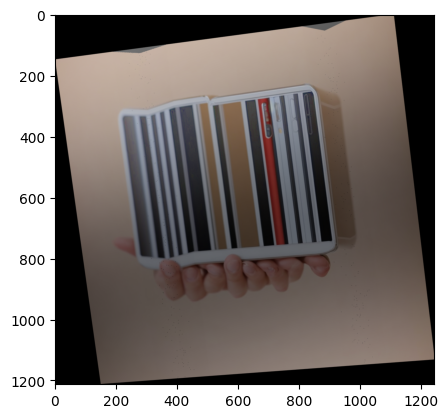

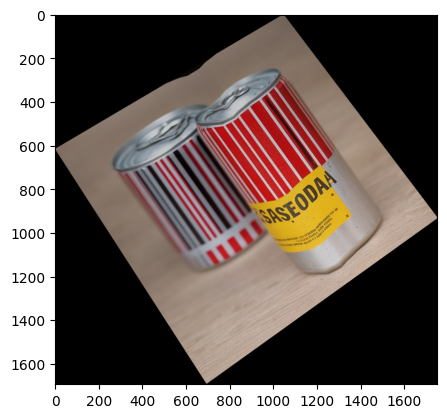

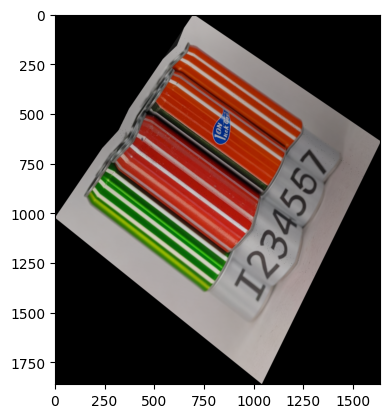

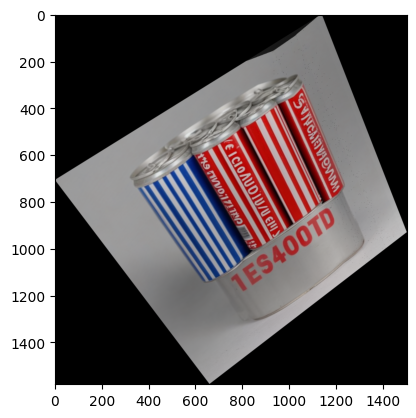

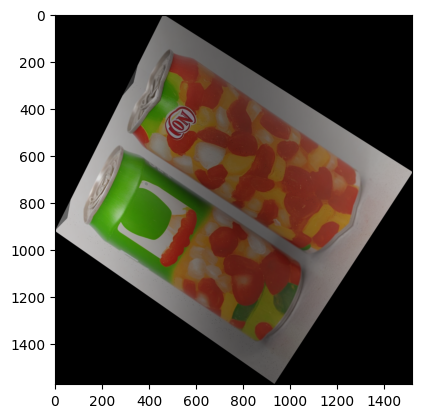

In [67]:
for item in imgs:
    plt.imshow(item)
    plt.show()

In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image, numpy_to_pil
import cv2

controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v1p_sd15",
                                             torch_dtype=torch.float16)

pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img


# play with guidance_scale, controlnet_conditioning_scale and strength to make a valid QR Code Image

# qr code image
# source_image = load_image("https://s3.amazonaws.com/moonup/production/uploads/6064e095abd8d3692e3e2ed6/A_RqHaAM6YHBodPLwqtjn.png")
# source_image = cv2.imread('/content/QRCODE_1234567.png')
# source_image = numpy_to_pil(source_image)[0]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look 

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
images = []
root, folders, files = list(os.walk('/content/'))[0]
for file in tqdm(files):
    f = f'{root}/{file}'
    if f[-3:] in ('png', 'jpg'):

        source_image = Image.open(f)
        # initial image, anything
        # init_image = load_image("https://s3.amazonaws.com/moonup/production/uploads/noauth/KfMBABpOwIuNolv1pe3qX.jpeg")
        init_image =  Image.open('/content/example.jpg') #source_image
        condition_image = resize_for_condition_image(source_image, 768)
        init_image = resize_for_condition_image(init_image, 768)
        generator = torch.manual_seed(123121231)
        image = pipe(prompt="Keep the code recognizable",
                    negative_prompt="ugly, disfigured, low quality, blurry, nsfw, bad paper effect, augmentations",
                    image=condition_image,
                    control_image=condition_image,
                    width=768,
                    height=768,
                    guidance_scale=20,
                    controlnet_conditioning_scale=1.5,
                    generator=generator,
                    strength=0.8,
                    num_inference_steps=150,
                    )
        images.append(image.images[0])
        plt.imshow(images[-1])
        plt.title(file)
        plt.show()